In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 

import scipy.stats as st

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier



import warnings
warnings.filterwarnings("ignore")


from sklearn import set_config
set_config(print_changed_only = False)

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip



# 1. Basic Classification Methods

## Load a simple dataset (e.g., Iris or Wine dataset).
## Implement a basic classification algorithm (e.g., Logistic Regression or K-Nearest Neighbors).
## Train the model and evaluate its accuracy using a test set.


In [3]:
wine = pd.read_csv(r"C:\Users\Админ\Desktop\wine.csv")
df = wine.copy()

In [4]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [7]:

y = df["quality"]

x = df.drop("quality", axis = 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

In [9]:


norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

In [10]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)


print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

Best score for train set: 0.6738725490196079
____________________________________________
best K value: 12 
best weights: distance 
best leaf size: 25


KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=np.int64(12),
                     p=2, weights='distance')

In [11]:

knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=np.int64(12),
                     p=2, weights='distance')

In [12]:

y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.665

# Exercise 2: Confusion Matrix and Classification Report

## Use the trained model to make predictions on the test set.
## Generate a confusion matrix and classification report using Scikit-learn.
## Discuss the results, focusing on precision, recall, and F1-score.


Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0   9   6   1   0]
 [  0   0 138  30   3   0]
 [  0   0  46 105  16   0]
 [  0   0   4  16  22   0]
 [  0   0   0   0   2   1]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.70      0.81      0.75       171
           6       0.67      0.63      0.65       167
           7       0.50      0.52      0.51        42
           8       1.00      0.33      0.50         3

    accuracy                           0.67       400
   macro avg       0.48      0.38      0.40       400
weighted avg       0.64      0.67      0.65       400



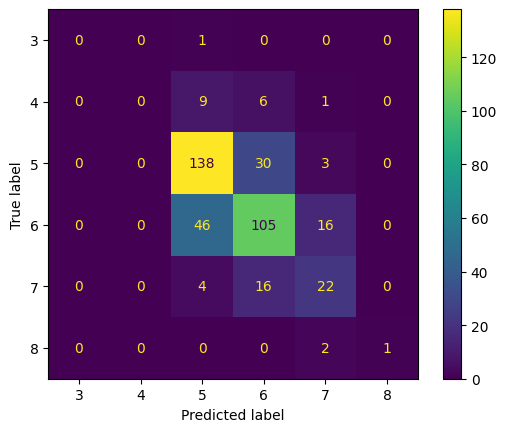

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


# Exercise 3: Implementing K-Means Clustering
## Load a dataset (e.g., customer data or a toy dataset).
## Use K-Means to group the data into clusters.
### Visualize the clusters using a scatter plot.


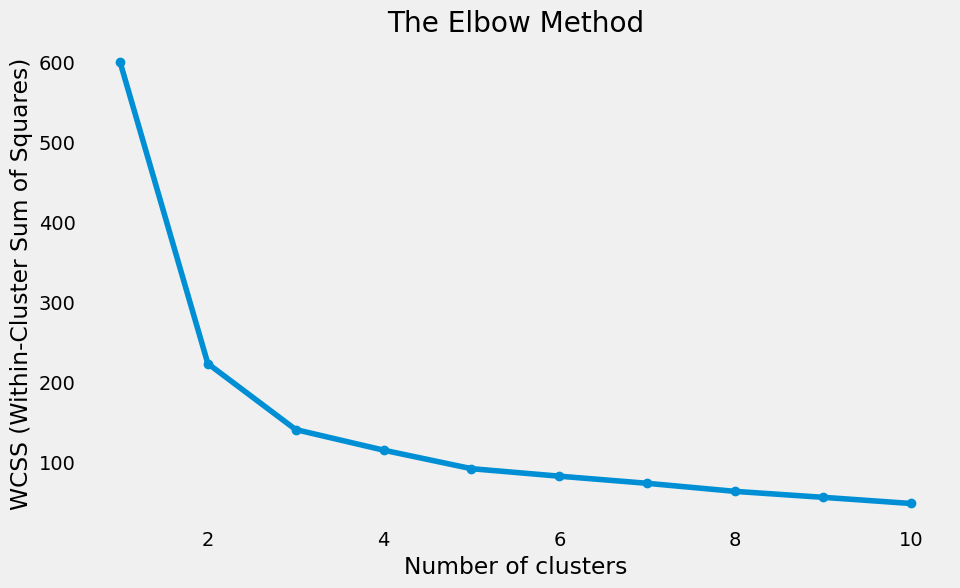

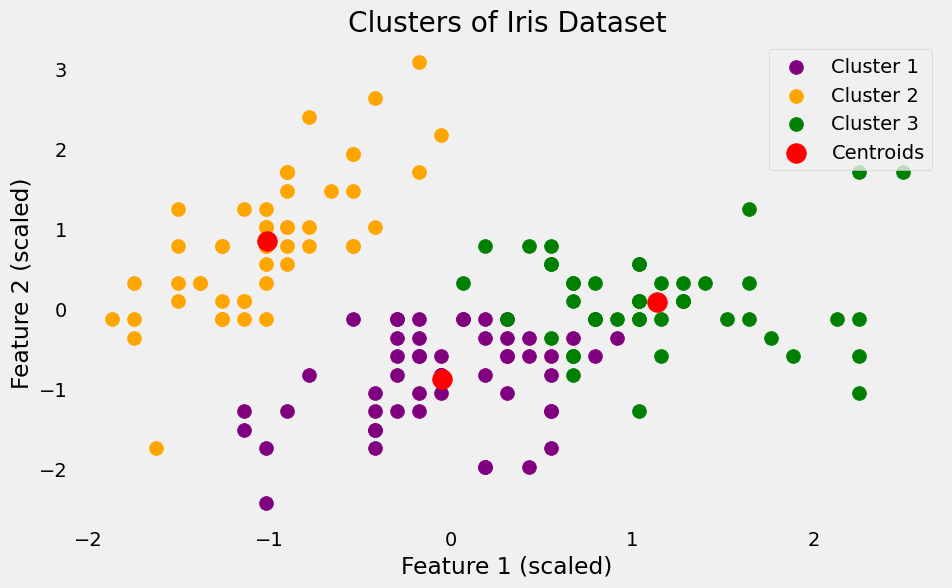

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


iris = load_iris()
X = iris.data 


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


optimal_clusters = 3


kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Clusters of Iris Dataset')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid()
plt.show()


### Exercise 4: Evaluating K-Means Clustering
### Objective: Evaluate the quality of clustering results.
### Tasks:
### Calculate the inertia (sum of squared distances of samples to their closest cluster center).
### Experiment with different numbers of clusters and plot the inertia to find the optimal number of clusters (Elbow Method).
### Discuss the results.


In [85]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv(r'C:\Users\Админ\Desktop\country_data.csv')

data=df.drop(['country'],axis=1)
scaling=StandardScaler()
scaled=scaling.fit_transform(data)
scaled_df=pd.DataFrame(scaled,columns=data.columns)


scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


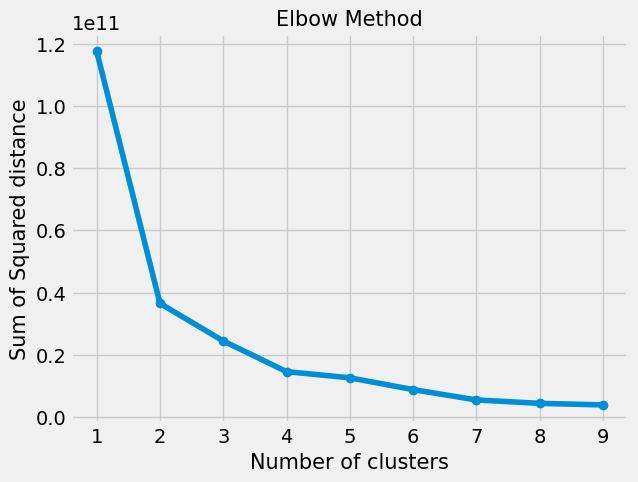

In [90]:

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [86]:
cluster_labels = kmeans.fit_predict(scaled_df)

In [87]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2


In [78]:
kmeans_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


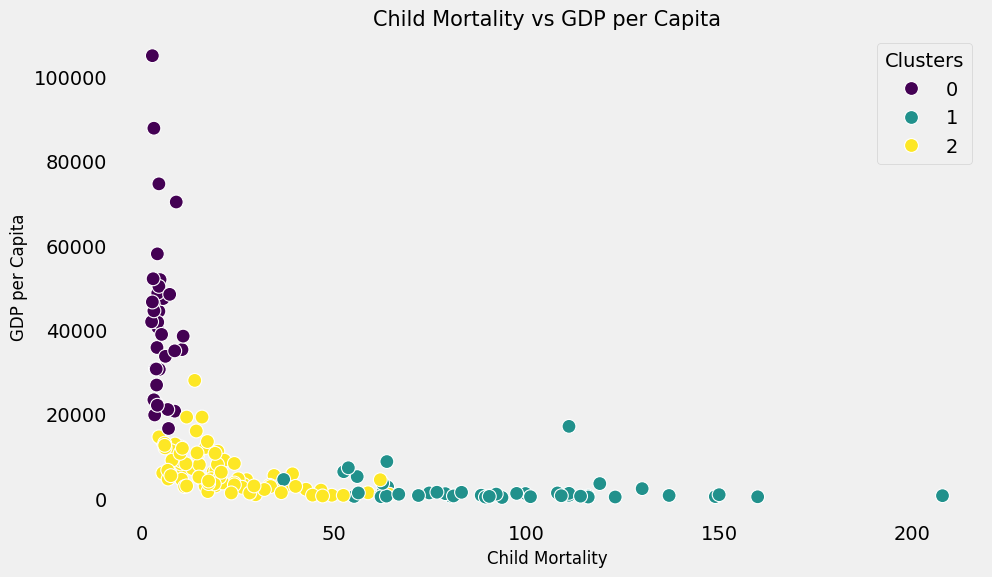

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x='child_mort', y='gdpp', hue='KMeans_Clusters', data=kmeans_df, palette='viridis', s=100)

plt.title("Child Mortality vs GDP per Capita", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("GDP per Capita", fontsize=12)
plt.legend(title='Clusters')
plt.grid()
plt.show()


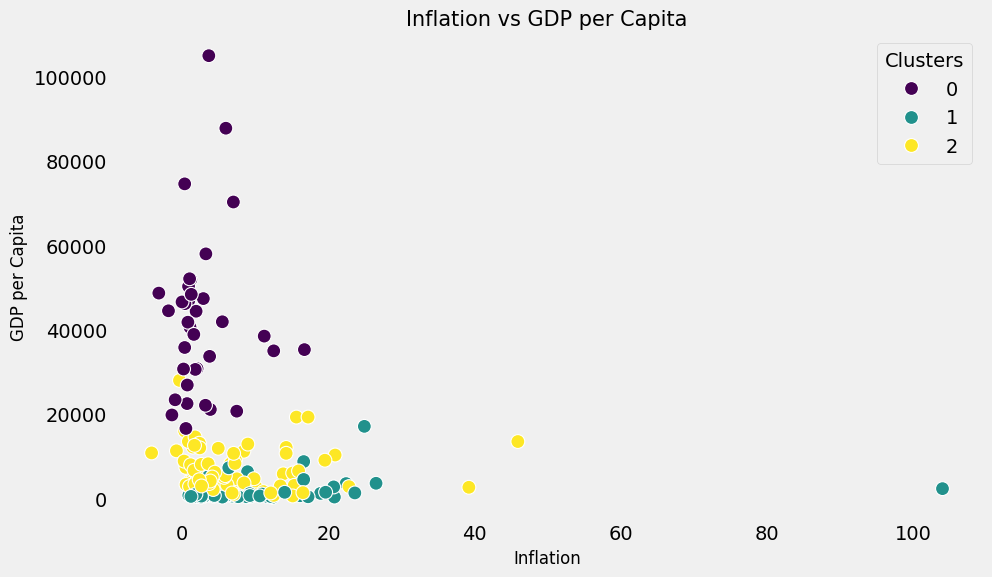

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x='inflation', y='gdpp', hue='KMeans_Clusters', data=kmeans_df, palette='viridis', s=100)

plt.title("Inflation vs GDP per Capita", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDP per Capita", fontsize=12)
plt.legend(title='Clusters')
plt.grid()
plt.show()


In [ ]:
# From above two clusters graph we can conclude that

# Country having high child-mortality, low GDP per catia and low inflation(The measurement of the annual growth rate of the Total GDP) is a under-developing country
# Country having low child-mortality, high gdpp and high infaltion is the developed country
# So here we conclude that
# 0 = under-developing country
# 1 = developing country
# 2 = developed country

### 3. Introduction to Advanced Clustering Techniques
### Exercise 5: Implementing Hierarchical Clustering
### Objective: Explore hierarchical clustering.
### Tasks:
### Apply Agglomerative Clustering to the same dataset used in K-Means.
### Visualize the results using a dendrogram to illustrate the clustering hierarchy.
### Compare the results with those from K-Means.


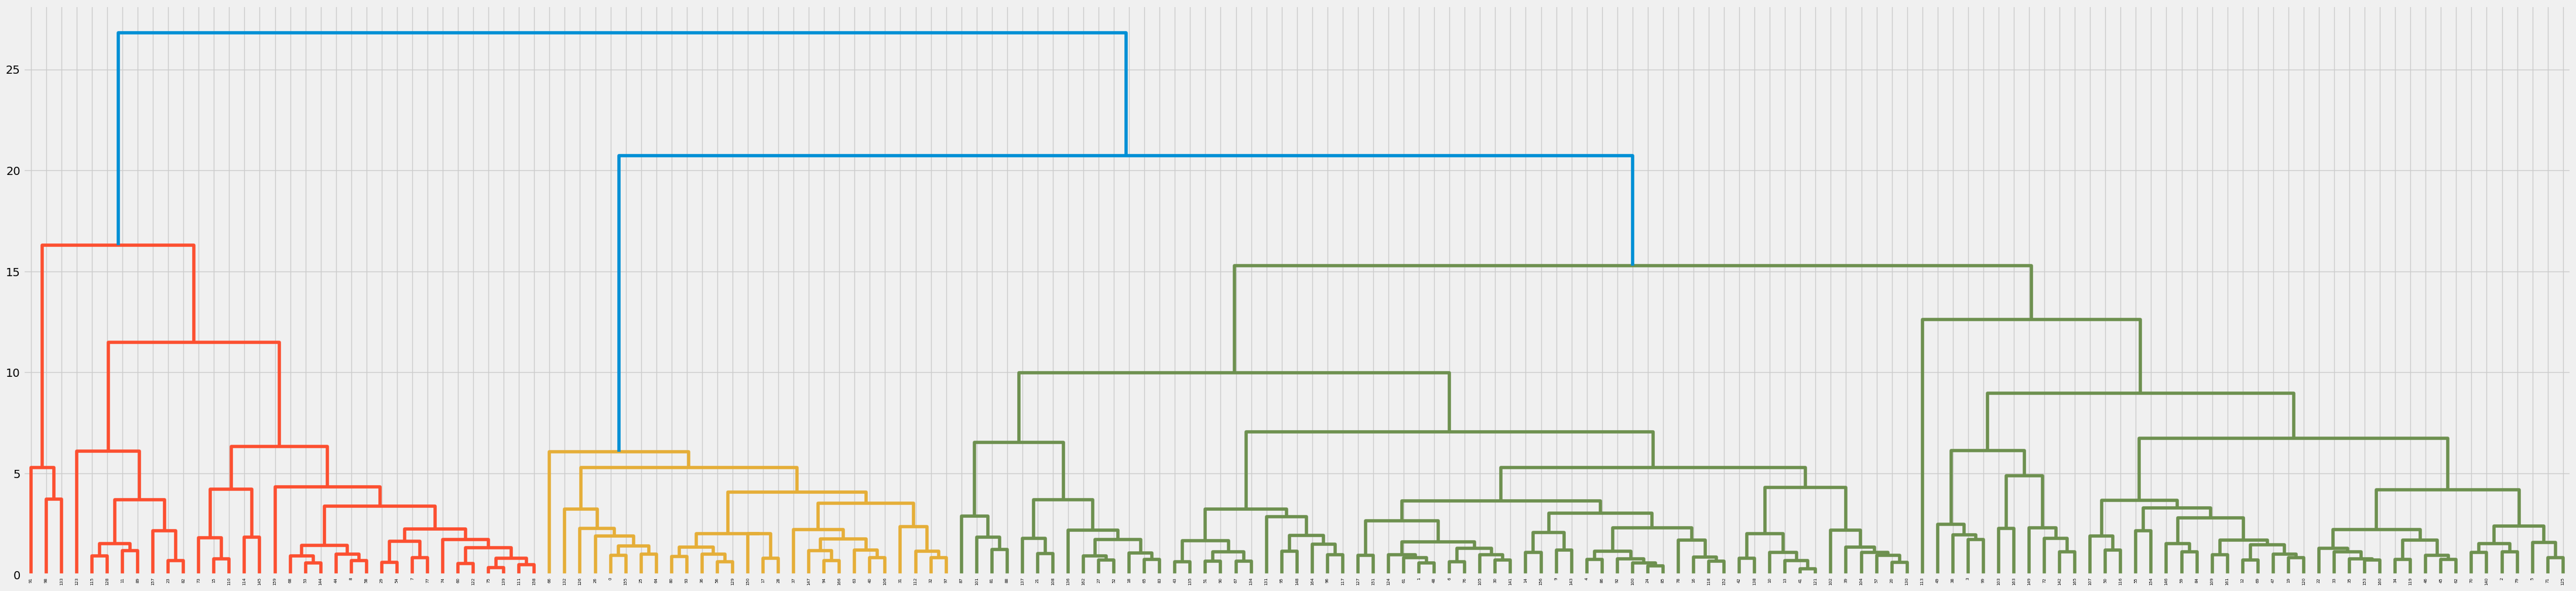

In [91]:

plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_df,method='ward'))


In [96]:
from sklearn.cluster import AgglomerativeClustering

hcluster = AgglomerativeClustering(n_clusters=3, linkage='ward')  
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_

In [97]:
hcluster_df = pd.DataFrame(df)

hcluster_df['hcluster'] = hcluster_label

hcluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


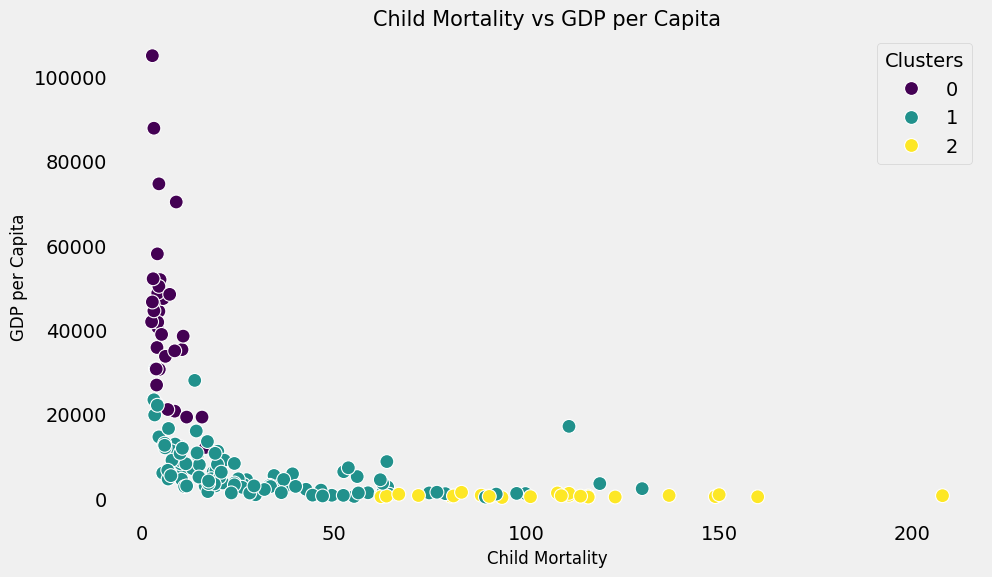

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='child_mort', y='gdpp', hue='hcluster', data=hcluster_df, palette='viridis', s=100)

plt.title("Child Mortality vs GDP per Capita", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("GDP per Capita", fontsize=12)
plt.legend(title='Clusters')
plt.grid()
plt.show()


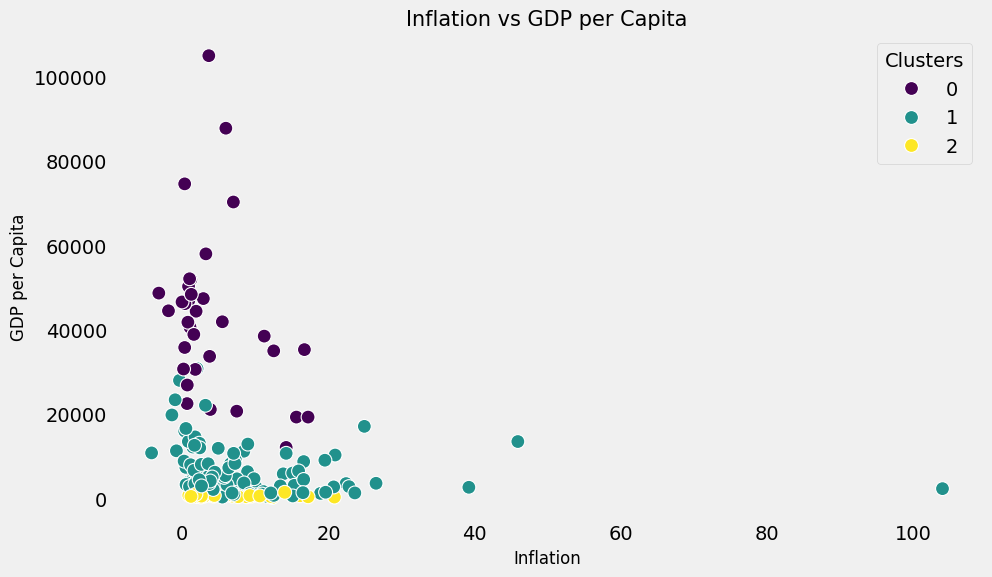

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='inflation', y='gdpp', hue='hcluster', data=hcluster_df, palette='viridis', s=100)

plt.title("Inflation vs GDP per Capita", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDP per Capita", fontsize=12)
plt.legend(title='Clusters')
plt.grid()
plt.show()


In [101]:

developed=hcluster_df[hcluster_df['hcluster']==0]['country']
developing=hcluster_df[hcluster_df['hcluster']==1]['country']
under_developing=hcluster_df[hcluster_df['hcluster']==2]['country']

print("Number of deveoped countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(under_developing))

Number of deveoped countries 34
Number of developing countries 106
Number of under-developing countries 27


### Exercise 6: Introduction to DBSCAN
### Objective: Understand density-based clustering.
### Tasks:
### Implement DBSCAN on the dataset and visualize the clusters.
### Discuss the parameters (eps and min_samples) and their effect on clustering results.
### Compare the performance of DBSCAN with K-Means


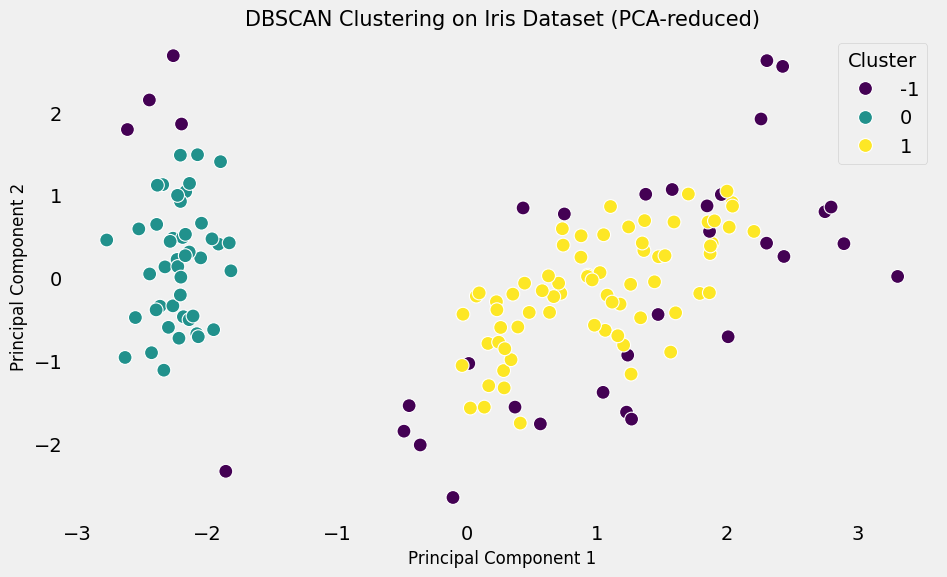

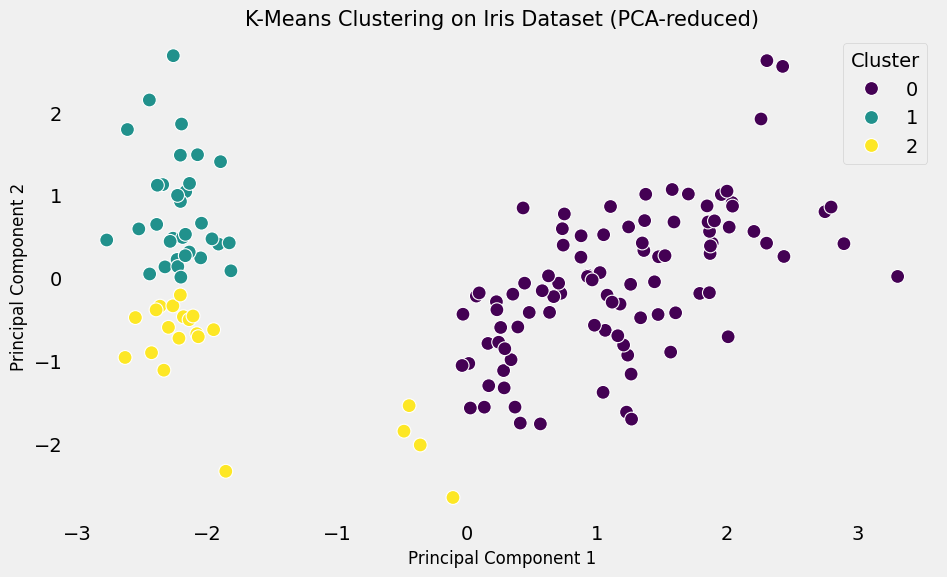

In [106]:

from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting DBSCAN results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='viridis', s=100)
plt.title("DBSCAN Clustering on Iris Dataset (PCA-reduced)", fontsize=15)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title='Cluster')
plt.grid()
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title("K-Means Clustering on Iris Dataset (PCA-reduced)", fontsize=15)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title='Cluster')
plt.grid()
plt.show()
